# Mark Subclip Intervals

This notebook is used to (manually) identify and document a 15-second interval in relevant videos where a humpback whale encounter is evident. 

We repeat a similar process for irrelevant videos, replacing manual interval annotation with a randomly generated 15-second interval. 

The 15-second intervals annotated here will serve as input for training our model. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
#load df of successful video downloads
workspace_path = '/mount/data'
downloads_df = pd.read_csv(workspace_path + '/downloaded_videos.csv')
downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,0:10,0:25
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,0:44,0:59
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,0:05,0:20
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,2:40,2:55
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,0:00,0:15


# Add a Column to Store Clip Interval 
(only run this once)

In [33]:
# downloads_df['clip_start'] = [''for i in range(0, len(downloads_df))]
# downloads_df['clip_end'] = ['' for i in range(0, len(downloads_df))]

# downloads_df.head()

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
0,67OIlq2oMt0,https://youtu.be/67OIlq2oMt0,Hawaiian Islands Humpback Whale National Marin...,creativeCommon,True,video_0000.mp4,,
1,EUcMuUBMYJc,https://youtu.be/EUcMuUBMYJc,Tagging expedition: revealing the delicate nur...,creativeCommon,True,video_0001.mp4,,
2,dpSuygz7ZmA,https://youtu.be/dpSuygz7ZmA,Your Earth Is Blue: Disentangling a Humpback W...,creativeCommon,True,video_0002.mp4,,
3,jfPzlFLEuKk,https://youtu.be/jfPzlFLEuKk,"Humpback Whale || Description, Characteristics...",creativeCommon,True,video_0003.mp4,,
4,xGasapMoy4I,https://youtu.be/xGasapMoy4I,Your Earth Is Blue: Humpback Whales,creativeCommon,True,video_0004.mp4,,


# Relevant Subclip Annotation

In [3]:
#functions to double check relevance of each new potential video
from IPython.display import YouTubeVideo, Image, display, Video, HTML

def display_video(index, video_title, url):
    # display video - need to pass in videoID (at end of url) 
    print("{}: {}".format(index, video_title))
    print(url)
    videoID = url.split('/')[3]
    display(YouTubeVideo(videoID))

def get_occurence_intervals():
    '''allows user to enter occurence interval start + end time'''

    start = input('Clip Start Time: ')
    end = input('Clip End Time:   ')

    return start, end

How many videos do you want to annotate?: 

 20


147: video_0184.mp4
https://youtu.be/f3YxmTuyWkc


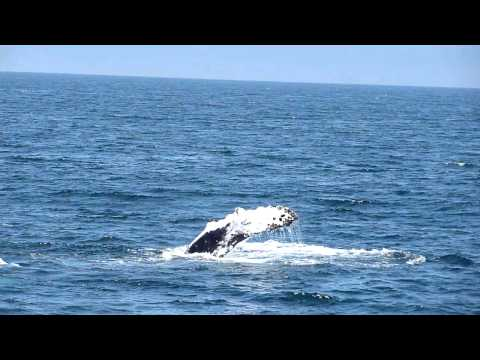

Clip Start Time:  0:00
Clip End Time:    0:15


153: video_0191.mp4
https://youtu.be/vvo_r70QoFU


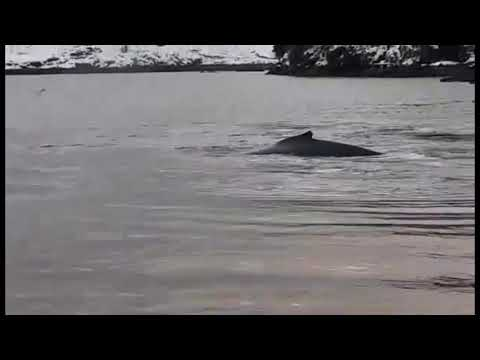

Clip Start Time:  0:25
Clip End Time:    0:40


156: video_0195.mp4
https://youtu.be/bVq6kl9Y-Hc


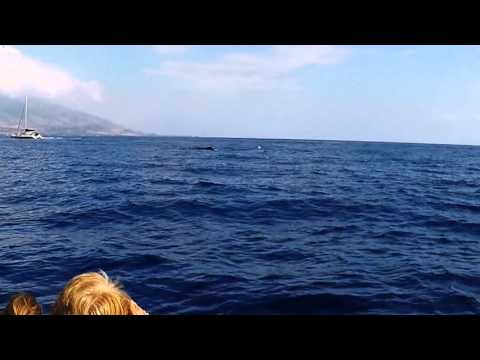

Clip Start Time:  3:00
Clip End Time:    3:19


158: video_0197.mp4
https://youtu.be/NgmkBsXlHnE


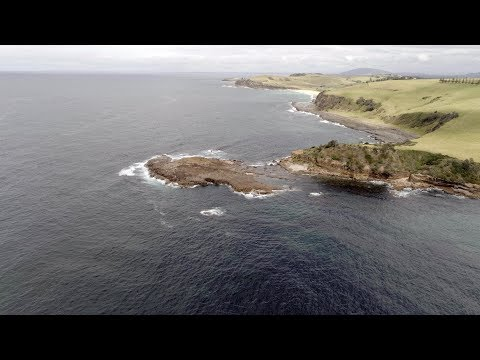

Clip Start Time:  1:15
Clip End Time:    1:30


159: video_0198.mp4
https://youtu.be/VYGBwJCNDos


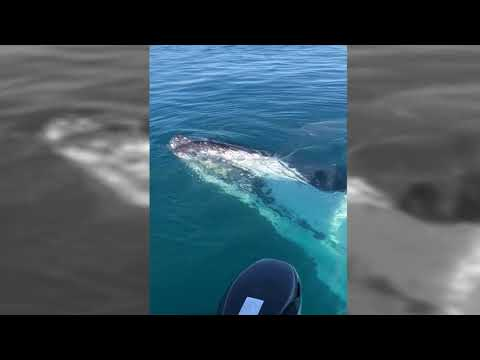

Clip Start Time:  0:20
Clip End Time:    0:35


160: video_0199.mp4
https://youtu.be/fYkjq6w8RYk


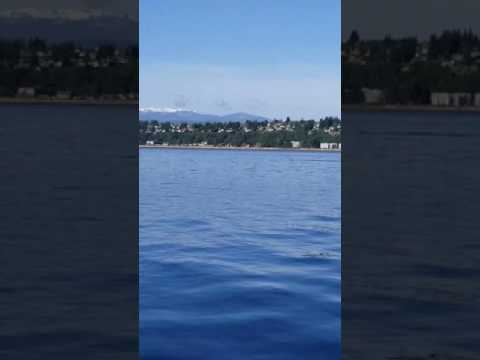

Clip Start Time:  0:13
Clip End Time:    0:28


162: video_0202.mp4
https://youtu.be/_gBjKebuSh4


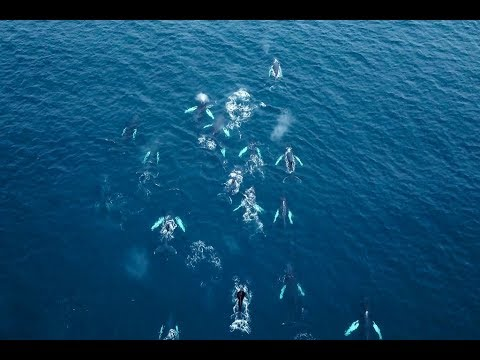

Clip Start Time:  1:25
Clip End Time:    1:40


164: video_0204.mp4
https://youtu.be/lQAkd8GFJH8


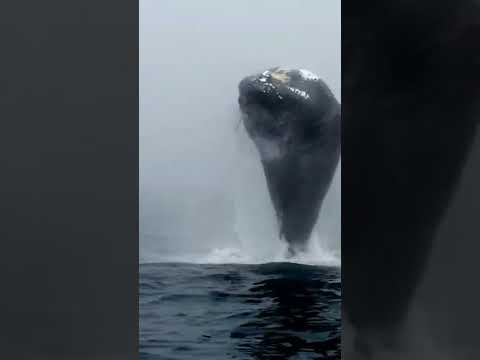

Clip Start Time:  0:00
Clip End Time:    0:15


167: video_0208.mp4
https://youtu.be/-5PXm8wsN-0


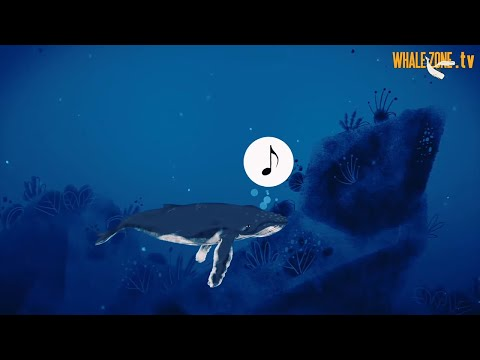

Clip Start Time:  1:40
Clip End Time:    1:55


168: video_0209.mp4
https://youtu.be/NqxuNJ8FJDg


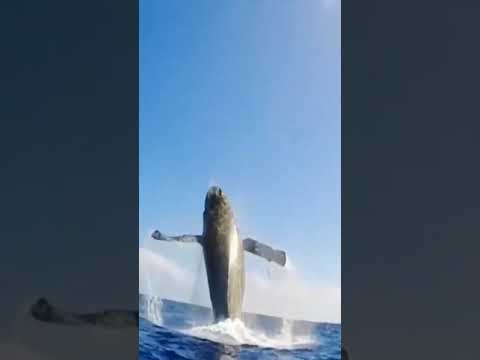

Clip Start Time:  0:00
Clip End Time:    0:08


170: video_0211.mp4
https://youtu.be/OTPQOVeP6Uk


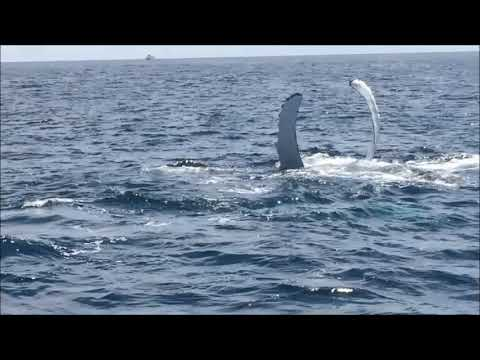

Clip Start Time:  3:05
Clip End Time:    3:20


171: video_0214.mp4
https://youtu.be/KV1XSxkNCl4


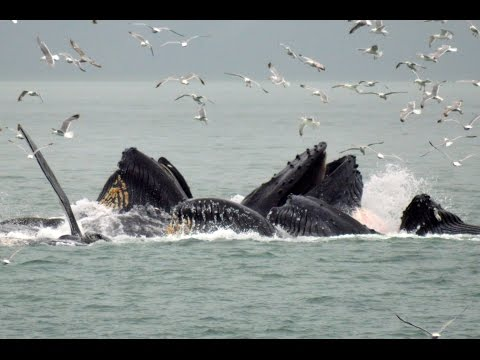

Clip Start Time:  1:40
Clip End Time:    1:55


172: video_0216.mp4
https://youtu.be/C3i2TOcx1Vc


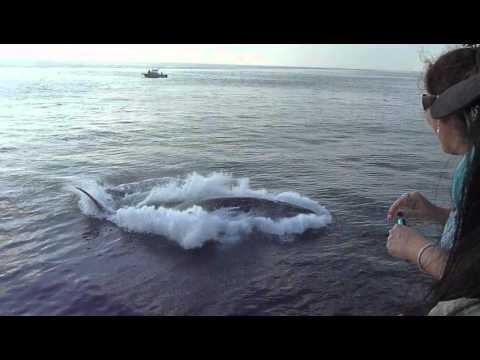

Clip Start Time:  0:00
Clip End Time:    0:09


173: video_0217.mp4
https://youtu.be/sUURQmZAiTg


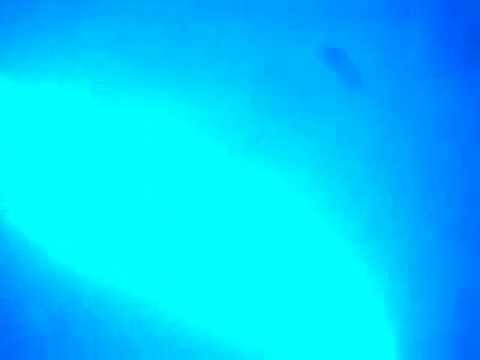

Clip Start Time:  0:38
Clip End Time:    0:53


175: video_0219.mp4
https://youtu.be/QUvxggkowAI


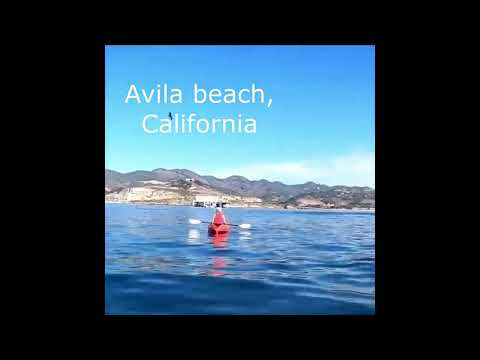

Clip Start Time:  0:25
Clip End Time:    0:40


178: video_0222.mp4
https://youtu.be/_GnB7uKLRYQ


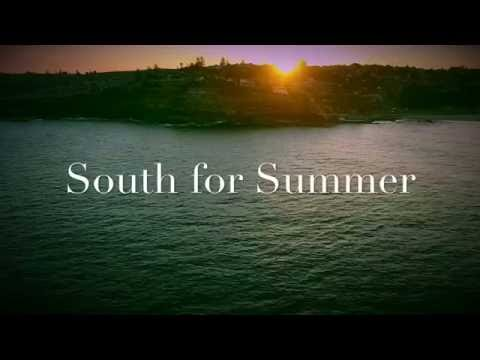

Clip Start Time:  0:40
Clip End Time:    0:55


182: video_0226.mp4
https://youtu.be/yrl8AqRP1pE


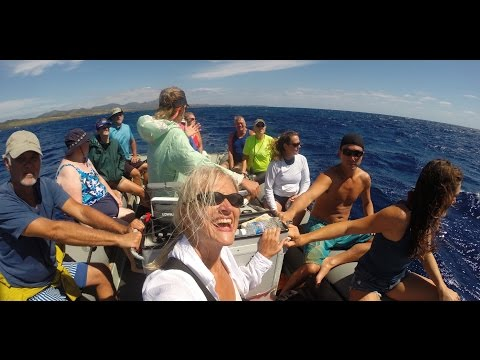

Clip Start Time:  0:55
Clip End Time:    1:10


184: video_0228.mp4
https://youtu.be/3S2PbkQwbyw


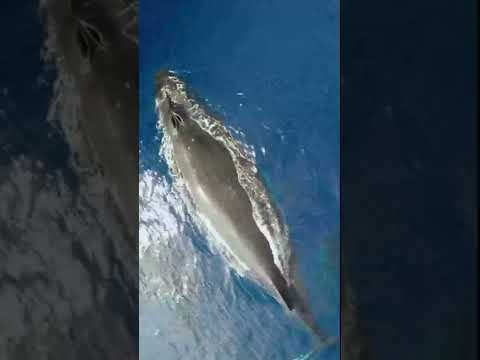

Clip Start Time:  0:05
Clip End Time:    0:20


188: video_0233.mp4
https://youtu.be/cGlbbXmUMKU


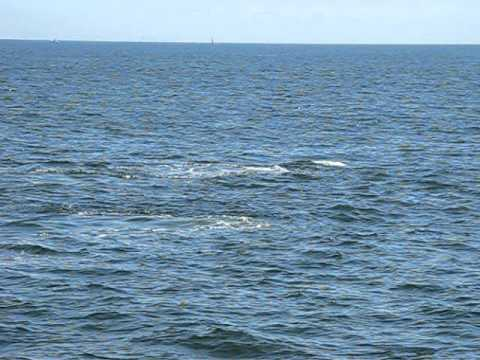

Clip Start Time:  0:00
Clip End Time:    0:14


192: video_0238.mp4
https://youtu.be/tGgBXiNOEc8


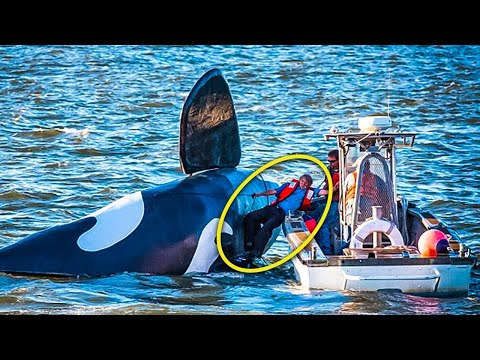

Clip Start Time:  0:40
Clip End Time:    0:55


Done annotating videos 147 to 192 



In [14]:
#loop through relevant videos and annotate whale encounter intervals
print('How many videos do you want to annotate?:', end = " ")
num_videos = int(input())

#pickup on the next relevant video w/o a clip interval
video_indices_to_annotate = list(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)].index)

#annotate clip intervals and record in dataset
for i in video_indices_to_annotate[:num_videos]:
    row = downloads_df.loc[i]
    display_video(i, row['renamed_title'], row['url'])
    clip_start, clip_end = get_occurence_intervals()
    downloads_df.at[i, ('clip_start')] = clip_start
    downloads_df.at[i, ('clip_end')] = clip_end   
    
print(f'Done annotating videos {video_indices_to_annotate[0]} to {video_indices_to_annotate[num_videos-1]} \n')

In [15]:
#checking updates
downloads_df[(downloads_df.clip_start.notna()) & (downloads_df.relevant == True)][-4:]

,video_id,url,title,license,relevant,renamed_title,clip_start,clip_end
182,yrl8AqRP1pE,https://youtu.be/yrl8AqRP1pE,Kauai Whales HD,creativeCommon,True,video_0226.mp4,0:55,1:10
184,3S2PbkQwbyw,https://youtu.be/3S2PbkQwbyw,#shorts | Big Blue Whale with drone&#39;s Foot...,creativeCommon,True,video_0228.mp4,0:05,0:20
188,cGlbbXmUMKU,https://youtu.be/cGlbbXmUMKU,humpback.AVI,creativeCommon,True,video_0233.mp4,0:00,0:14
192,tGgBXiNOEc8,https://youtu.be/tGgBXiNOEc8,"They Came Across A Giant Orca, On Closer Inspe...",creativeCommon,True,video_0238.mp4,0:40,0:55


In [16]:
print(len(downloads_df[(downloads_df.clip_start.isna()) & (downloads_df.relevant == True)]), 'more relevant videos to annotate')

50 more relevant videos to annotate


# Save Changes

In [17]:
# update csv with annotated intervals
downloads_df.to_csv(workspace_path + '/downloaded_videos.csv', index=False)
downloads_df.to_csv('/workspace/youtube-humpback-whale-classifier/data/downloaded_videos.csv', index=False)